<a href="https://colab.research.google.com/github/CarinaGiovine/DiploDatos2022/blob/main/predict_Boston_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR']) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['feature_names'] 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# se convirte el conjunto de datos en un dataframe de pandas para realizar un análisis exploratorio de los datos
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['MEDV'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No hay valores perdidos en el conjunto de datos

---



Se trazar la distribución de la variable objetivo (MEDV), a través de un gráfico de histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


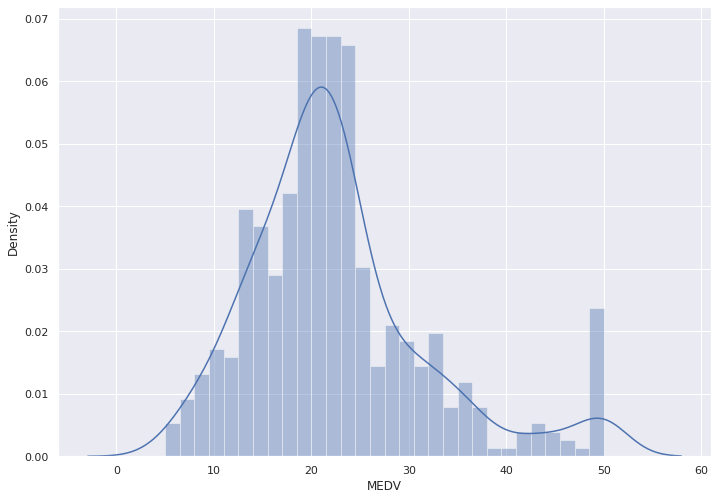

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['MEDV'], bins=30)
plt.show()

Los valores MEDV se distribuyen normalmente con pocos valores atípicos

In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


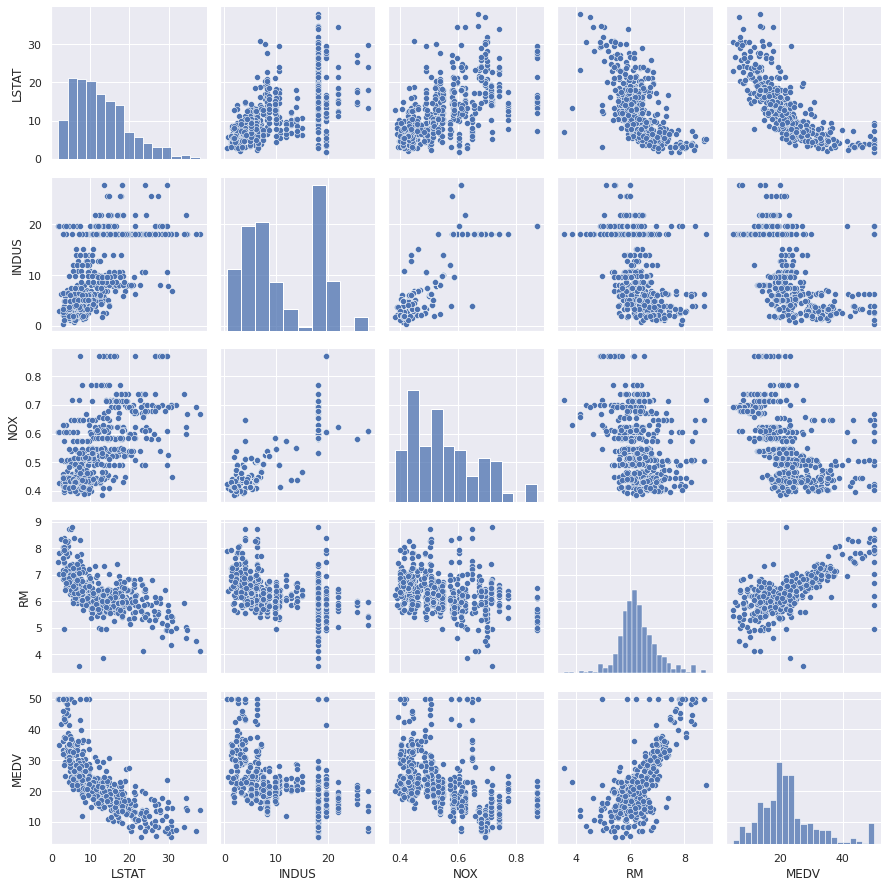

In [35]:
cols=['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(bos[cols], size=2.5)
plt.tight_layout()
plt.show()

Feature Selection
La selección de características es el proceso en el que se seleccionan automática o manualmente las características que más contribuyen a la variable de predicción o al resultado en el que se está interesado. Tener características irrelevantes en sus datos puede disminuir la precisión de los modelos y hacer que su modelo aprenda basado en características irrelevantes.

In [38]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = bos.iloc[:,0:13] #independent columns
y = bos.iloc[:,-1] #target column i.e price range

Nota: Si queremos identificar las mejores características para las variables objetivo. Debemos asegurarnos de que la variable de destino debe ser valores int. Por eso convierto en el valor int desde el valor de punto flotante

A través de una matriz de correlación se visualizan las relaciones lineales entre las variables.

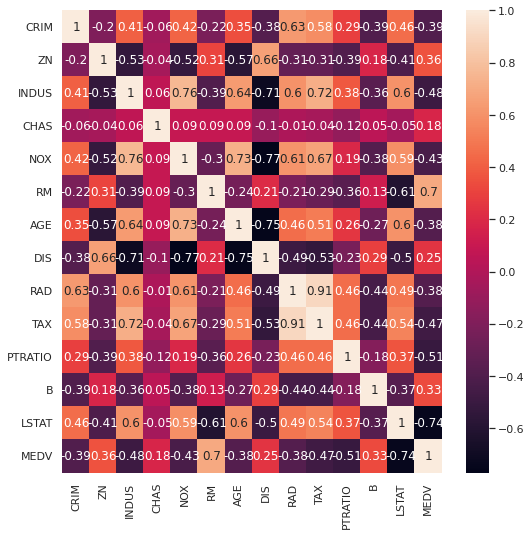

In [11]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

A partir de la matriz de correlación, podemos ver que TAX y RAD están muy correlacionados, y cualquiera de ellos puede ser descartado. Además, LSTAT, RM, NOX, INDUS, PRTAIO y TAX tienen una correlación superior a 0,4 con el MEDV, lo que constituye un buen indicador para utilizar estos parámetros como predictores. Visualicemos la relación entre estas características y el MEDV.


---


TAX and RAD have a high correlation of 0.91

NOX and INDUS have a high correlation of 0.76

DIS and NOX have a high correlation of -0.77

Deberíamos eliminar estos valores para mejor precisión.


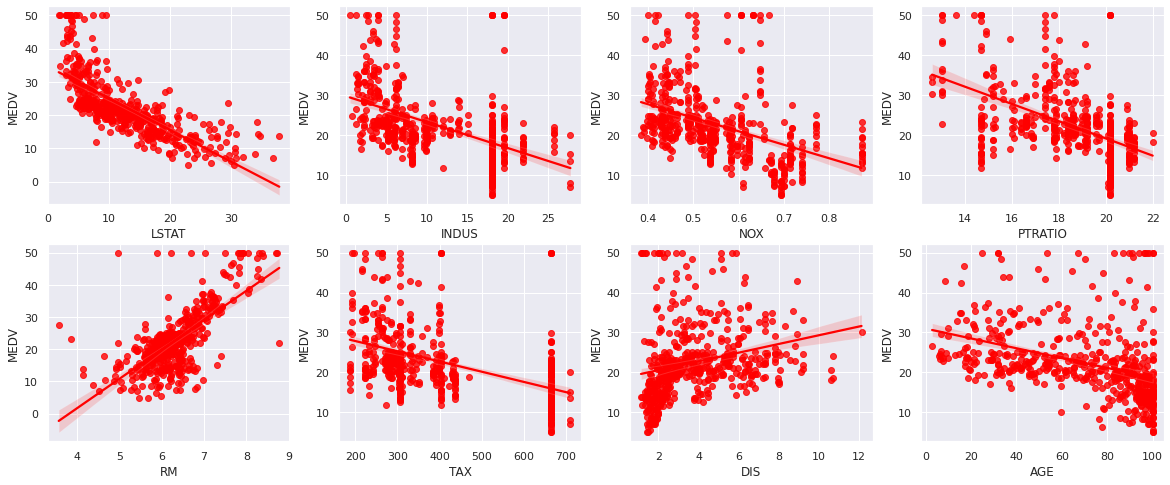

In [36]:
fig, axs= plt.subplots(nrows=2, ncols=4, figsize=(20,8))
cols= ['LSTAT', 'INDUS', 'NOX','PTRATIO','RM','TAX', 'DIS', 'AGE']
for col, ax in zip(cols, axs.flat):
  sns.regplot(x=bos[col], y=bos['MEDV'], color='red', ax=ax)



---


El coeficiente de correlación oscila entre -1 y 1. Si el valor se acerca a 1, significa que existe una fuerte correlación positiva entre las dos variables. Cuando se acerca a -1, las variables tienen una fuerte correlación negativa.


---


Al observar la matriz de correlación, podemos ver que RM tiene una fuerte correlación positiva con PRICE (0,7), mientras que LSTAT tiene una alta correlación negativa con PRICE (-0,74).


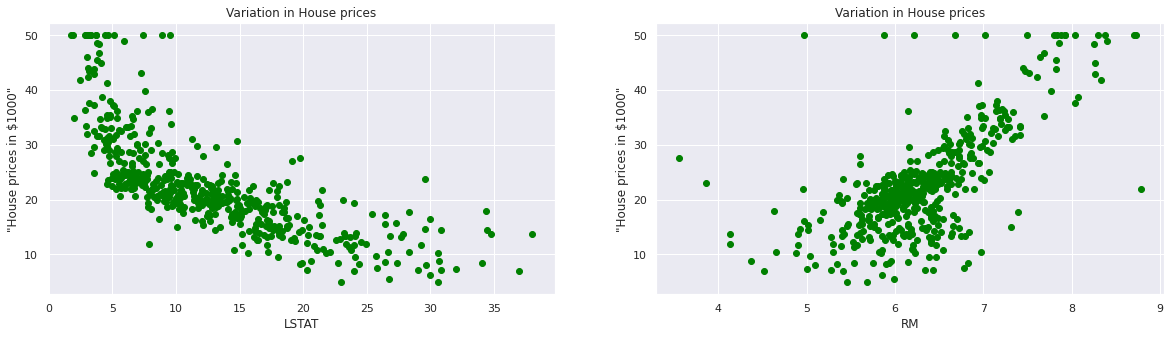

In [13]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['MEDV']

for i, col in enumerate(features):
   plt.subplot(1, len(features) , i+1)
   x = bos[col]
   y = target
   plt.scatter(x, y,color='green', marker='o')
   plt.title("Variation in House prices")
   plt.xlabel(col)
   plt.ylabel('"House prices in $1000"')

Los precios aumentan a medida que el valor de la RM aumenta linealmente. Hay pocos valores atípicos y los datos parecen estar limitados a 50.


Los precios tienden a disminuir con el aumento de LSTAT. Aunque no parece seguir exactamente una línea lineal.

'RM' muestra una correlación positiva con los precios de la vivienda, por lo que utilizaremos esta variable.

In [25]:
# Shape of dataset
print('Shape of Training dataset: ', bos.shape)


Shape of Training dataset:  (506, 14)


In [16]:
X_rooms = bos.RM
y_price = bos.MEDV

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

Como tenemos que probar nuestro modelo, dividimos los datos en conjuntos de entrenamiento y de prueba. Entrenamos el modelo con el 80% de las muestras y lo probamos con el 20% restante. Lo hacemos para evaluar el rendimiento del modelo en datos no vistos.

Para dividir los datos utilizamos la función train_test_split 

In [17]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1=train_test_split(X_rooms, y_price, test_size=0.2, random_state=5)

In [30]:
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


Training and Testing the Model 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


reg_1=LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1=reg_1.predict(X_train_1)
rmse= (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2=round(reg_1.score(X_train_1, Y_train_1),2)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


RMSE is 6.972277149440585
R2 score is 0.43


Rendimiento del modelo 


La desviación media cuadrática (RMSD) o error medio cuadrático (RMSE) es una medida frecuentemente utilizada de las diferencias entre los valores (valores de la muestra o de la población) predichos por un modelo o un estimador y los valores observados

In [32]:
y_pred_1=reg_1.predict(X_test_1)
rmse= (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2=round(reg_1.score(X_test_1, Y_test_1),2)

print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

Root Mean Squared Error: 4.895963186952216
R^2: 0.69





---
Error cuadrático medio (RMSE): Se calcula tomando la suma de los errores 
residuales al cuadrado y luego tomando la raíz cuadrada de la suma total. Cuanto menor es el RMSE, mejor es el modelo. Además, el RMSE también describe la desviación estándar de los errores con respecto a la línea de mejor ajuste, es decir, la dispersión de los valores de los errores residuales con respecto a la línea de mejor ajust


---



Graficando


Trazado de un gráfico de dispersión para el rendimiento de nuestro modelo en el que la etiqueta del eje x = características de la casa y la etiqueta del eje y = precio de la casa

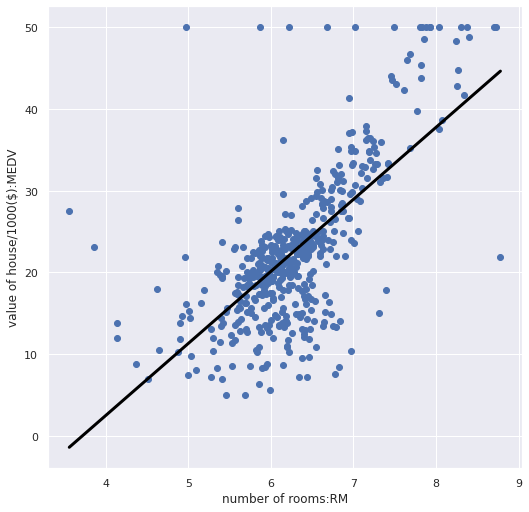

In [34]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($):MEDV')
plt.xlabel('number of rooms:RM')
plt.show()

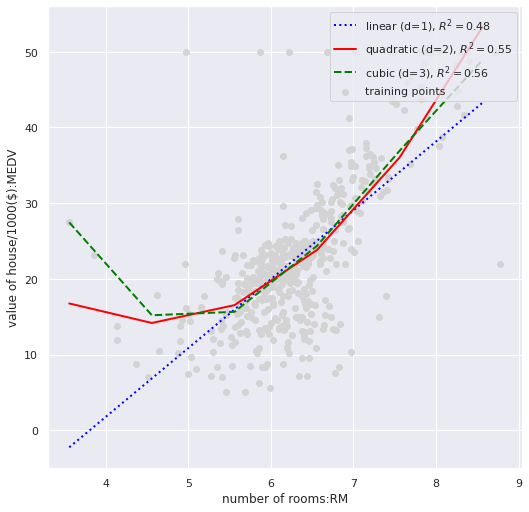

In [48]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

L = bos[['RM']].values
y = bos['MEDV'].values
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
L_quad = quadratic.fit_transform(L)
L_cubic = cubic.fit_transform(L)

# linear fit
L_fit = np.arange(L.min(), L.max(), 1)[:, np.newaxis]
regr = regr.fit(L,y)
y_lin_fit = regr.predict(L_fit)
linear_r2 = r2_score(y, regr.predict(L))

# quadratic fit
regr = regr.fit(L_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(L_fit))
quadratic_r2 = r2_score(y, regr.predict(L_quad))

# cubic fit
regr = regr.fit(L_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(L_fit))
cubic_r2 = r2_score(y, regr.predict(L_cubic))

#Plot results
plt.scatter(L, y,
           label='training points',
           color='lightgray')
plt.plot(L_fit, y_lin_fit,
        label='linear (d=1), $R^2=%.2f$'
        % linear_r2,
        color='blue',
        lw=2,
        linestyle=':')
plt.plot(L_fit, y_quad_fit,
        label='quadratic (d=2), $R^2=%.2f$'
        % quadratic_r2,
        color='red',
        lw=2,
        linestyle='-')
plt.plot(L_fit, y_cubic_fit,
        label='cubic (d=3), $R^2=%.2f$'
        % cubic_r2,
        color='green',
        lw=2,
        linestyle='--')
plt.xlabel('number of rooms:RM')
plt.ylabel('value of house/1000($):MEDV')
plt.legend(loc='upper right')
plt.show()

Regresión con 'LSTAT'

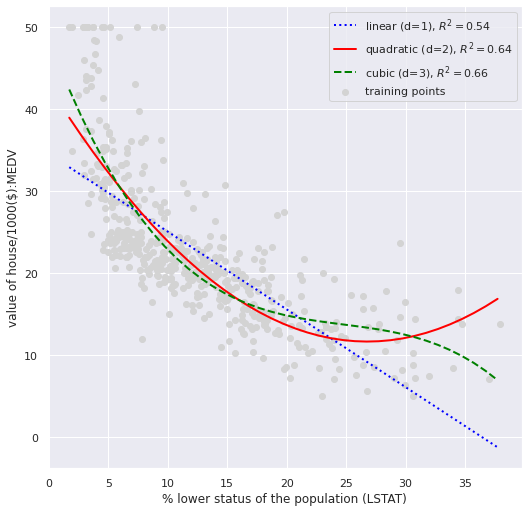

In [49]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

L = bos[['LSTAT']].values
y = bos['MEDV'].values
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
L_quad = quadratic.fit_transform(L)
L_cubic = cubic.fit_transform(L)

# linear fit
L_fit = np.arange(L.min(), L.max(), 1)[:, np.newaxis]
regr = regr.fit(L,y)
y_lin_fit = regr.predict(L_fit)
linear_r2 = r2_score(y, regr.predict(L))

# quadratic fit
regr = regr.fit(L_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(L_fit))
quadratic_r2 = r2_score(y, regr.predict(L_quad))

# cubic fit
regr = regr.fit(L_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(L_fit))
cubic_r2 = r2_score(y, regr.predict(L_cubic))

#Plot results
plt.scatter(L, y,
           label='training points',
           color='lightgray')
plt.plot(L_fit, y_lin_fit,
        label='linear (d=1), $R^2=%.2f$'
        % linear_r2,
        color='blue',
        lw=2,
        linestyle=':')
plt.plot(L_fit, y_quad_fit,
        label='quadratic (d=2), $R^2=%.2f$'
        % quadratic_r2,
        color='red',
        lw=2,
        linestyle='-')
plt.plot(L_fit, y_cubic_fit,
        label='cubic (d=3), $R^2=%.2f$'
        % cubic_r2,
        color='green',
        lw=2,
        linestyle='--')
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('value of house/1000($):MEDV')
plt.legend(loc='upper right')
plt.show()